In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_predict
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import f1_score, r2_score, accuracy_score, recall_score, precision_score,  roc_auc_score, confusion_matrix 
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings('ignore')

C:\Users\allan\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\allan\anaconda3\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
C:\Users\allan\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
# loading the dataset  
data = pd.read_csv('./data/bank2.csv')

# Check the header of the dataset  
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [3]:
# Check all labels along with their data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [4]:
# Rename target data column
data=data.rename(columns={'y': 'signup'})

In [5]:
# Remap the education column
data['education']=data['education'].replace(['primary', 'secondary', 'tertiary'], ['elementry', 'high school', 'university'])

In [6]:
# Count the # of customers who signup for the account (target)
data.signup.value_counts()

no     4000
yes     521
Name: signup, dtype: int64

In [7]:
# Combine the month and day column to form new column with 'datatime' data type
tmp=[]
for i in range(0, len(data)):
      tmp.append(datetime.strptime(data['month'][i], '%b').month)
data=data.assign(monthnum = tmp)

In [8]:
# Map the target column from yes/no to 1/0
tmp2=[]
for i in range(0, len(data)):
      if data.signup[i]=='yes':
        tmp2.append(int(1))
      else:
        tmp2.append(int(0))
data=data.assign(signup2 = tmp2)

In [9]:
# review the stats for all numeric label of the dataset 
data.describe()

,age,balance,day,duration,campaign,pdays,previous,monthnum,signup2
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579,6.166777,0.115240
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562,2.378380,0.319347
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000,1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000,5.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000,6.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000,8.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000,12.000000,1.000000


In [10]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,signup,monthnum,signup2
0,30,unemployed,married,elementry,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,10,0
1,33,services,married,high school,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,5,0
2,35,management,single,university,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,4,0
3,30,management,married,university,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,6,0
4,59,blue-collar,married,high school,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,5,0


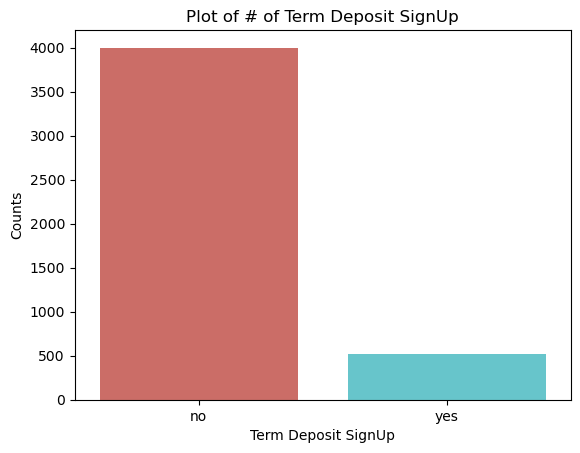

In [11]:
# Plot the countplot of the target data to check for imbalance
sns.countplot(x='signup',data=data,palette='hls')

# Add labels
plt.title('Plot of # of Term Deposit SignUp')
plt.xlabel('Term Deposit SignUp')
plt.ylabel('Counts')
plt.show()

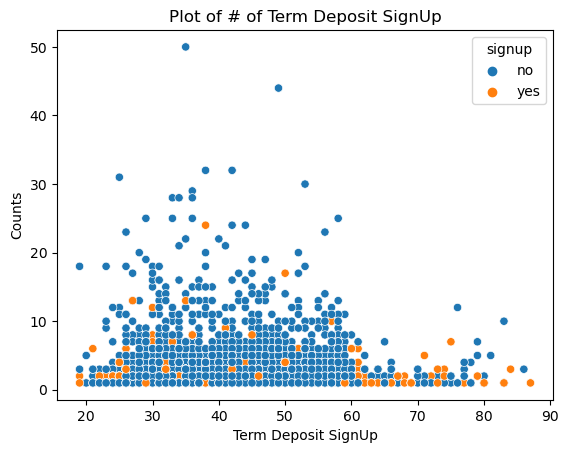

In [12]:
# Plot the scatterplot of # of campaign against age and # of signup
sns.scatterplot(data=data, x="age", y="campaign", hue="signup")
# Add labels
plt.title('Plot of # of Term Deposit SignUp')
plt.xlabel('Term Deposit SignUp')
plt.ylabel('Counts')
plt.show()

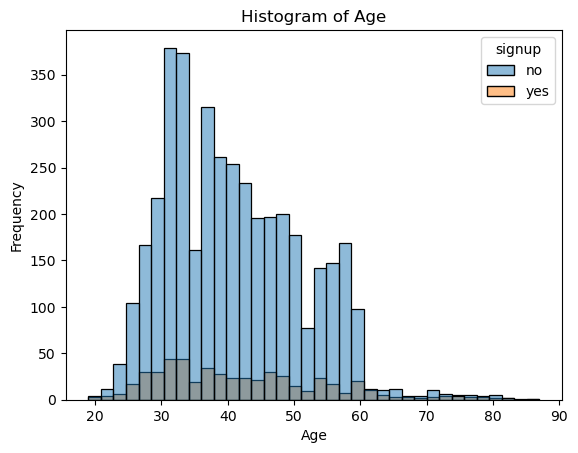

In [13]:
# Plot the histogram of customer's age
sns.histplot(data=data, x="age", hue="signup")
# Add labels
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

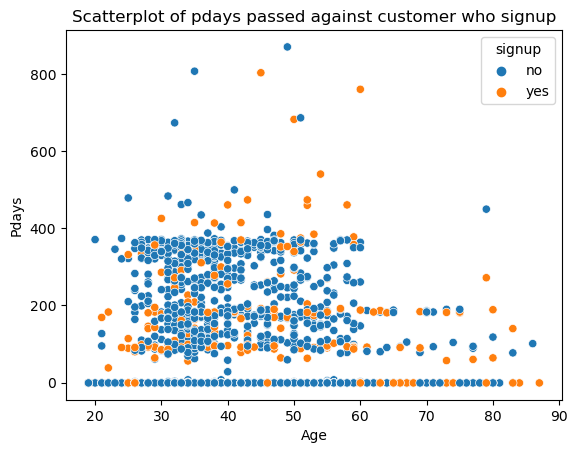

In [14]:
# Plot the scatterplot of day passed of previous campaign against signups
sns.scatterplot(data=data, x="age", y="pdays", hue="signup")
# Add labels
plt.title('Scatterplot of pdays passed against customer who signup')
plt.xlabel('Age')
plt.ylabel('Pdays')
plt.show()

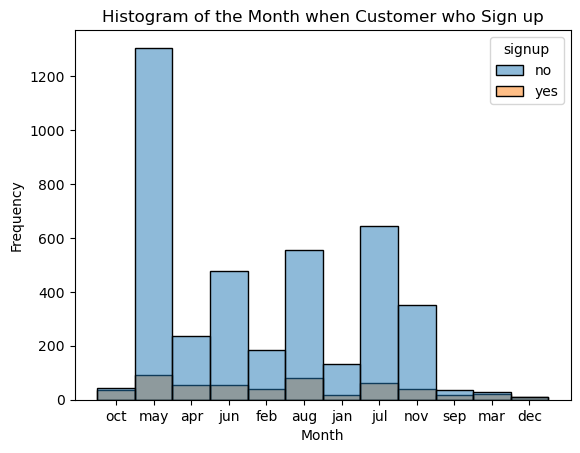

In [15]:
# Plot the histogram of month during signup
sns.histplot(data=data, x="month", hue="signup")
# Add labels
plt.title('Histogram of the Month when Customer who Sign up')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.show()

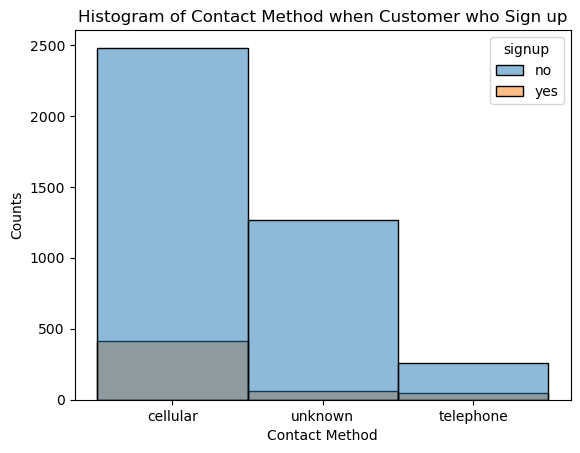

In [16]:
# Plot the histogram of month during signup
sns.histplot(data=data, x="contact", hue="signup")
# Add labels
plt.title('Histogram of Contact Method when Customer who Sign up')
plt.xlabel('Contact Method')
plt.ylabel('Counts')
plt.show()

In [17]:
# Review all data by grouping signup column
data.groupby('signup').mean()

,age,balance,day,duration,campaign,pdays,previous,monthnum,signup2
signup,,,,,,,,,
no,40.998000,1403.211750,15.948750,226.347500,2.862250,36.006000,0.471250,6.146750,0.0
yes,42.491363,1571.955854,15.658349,552.742802,2.266795,68.639155,1.090211,6.320537,1.0


In [18]:
# Review all data by grouping job column
data.groupby('job').mean()

,age,balance,day,duration,campaign,pdays,previous,monthnum,signup2
job,,,,,,,,,
admin.,39.682008,1226.736402,16.324268,234.669456,2.631799,49.993724,0.644351,6.002092,0.121339
blue-collar,40.156448,1085.161734,15.482030,278.161734,2.846723,41.590909,0.493658,5.674419,0.072939
entrepreneur,42.011905,1645.125000,15.255952,285.476190,2.589286,32.273810,0.428571,6.648810,0.089286
housemaid,47.339286,2083.803571,15.294643,292.633929,2.500000,26.401786,0.357143,6.705357,0.125000
management,40.540764,1766.928793,16.254902,260.536636,2.973168,40.968008,0.549020,6.568627,0.135191
retired,61.869565,2319.191304,15.556522,285.656522,2.465217,35.073913,0.591304,6.278261,0.234783
self-employed,41.453552,1392.409836,16.180328,264.125683,3.278689,28.256831,0.590164,6.398907,0.109290
services,38.570743,1103.956835,15.515588,262.486811,2.822542,36.371703,0.443645,5.908873,0.091127
student,26.821429,1543.821429,16.392857,248.690476,2.392857,45.714286,0.964286,5.940476,0.226190


In [19]:
# Review all data by grouping marital column
data.groupby('marital').mean()

,age,balance,day,duration,campaign,pdays,previous,monthnum,signup2
marital,,,,,,,,,
divorced,45.475379,1122.390152,15.753788,279.232955,2.604167,38.827652,0.439394,6.240530,0.145833
married,43.454415,1463.195567,15.905971,256.528781,2.847336,38.466929,0.519128,6.257776,0.099035
single,33.927258,1460.414716,16.008361,274.601171,2.751672,43.220736,0.642977,5.921405,0.139632


In [20]:
# Review all data by grouping education column
data.groupby('education').mean()

,age,balance,day,duration,campaign,pdays,previous,monthnum,signup2
education,,,,,,,,,
elementry,46.833333,1411.544248,15.505900,261.709440,2.865782,35.069322,0.460177,5.992625,0.094395
high school,40.062446,1196.814397,15.977884,269.863833,2.734172,40.934085,0.528621,6.036427,0.106245
university,39.645926,1775.423704,16.009630,256.881481,2.901481,39.824444,0.612593,6.506667,0.142963
unknown,45.299465,1701.245989,15.946524,250.449198,2.486631,41.983957,0.508021,5.951872,0.101604


In [21]:
#Create transformer for numeric features
numeric_features = ['age','duration','monthnum','campaign','pdays','previous','balance','day']
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)
#Create transformer for categorical features
categorical_features = ['housing','loan','default']
categorical_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore"))
    ]
)
#Create preprocessor to transform both numeric and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

In [22]:
#Create pipeline for Logistic Regression
log_pipe = Pipeline(
    [
        ('preprocessing', preprocessor),
        ('logreg', LogisticRegression())
    ]
)
log_pipe

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'duration',
                                                   'monthnum', 'campaign',
                                                   'pdays', 'previous',
                                                   'balance', 'day']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['housing', 'loan',
                                                   'default'])])),
                ('logreg', LogisticRegression())])

In [23]:
# Drop columns that has no direct impact to the target output
X=data.drop(columns=['signup','signup2','marital','job','education','month','poutcome','contact'])
y=data.signup2

In [24]:
X.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,monthnum
0,30,no,1787,no,no,19,79,1,-1,0,10
1,33,no,4789,yes,yes,11,220,1,339,4,5
2,35,no,1350,yes,no,16,185,1,330,1,4
3,30,no,1476,yes,yes,3,199,4,-1,0,6
4,59,no,0,yes,no,5,226,1,-1,0,5


In [25]:
# Split the data into training and test data with 70/30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

log_pipe.fit(X_train, y_train)
print("model score: %.3f" % log_pipe.score(X_test, y_test))

model score: 0.881


In [26]:
#Create pipeline for Decision Tree 
dt_pipe = Pipeline(
    [
        ('preprocessing', preprocessor),
        ('dtree', DecisionTreeClassifier())
    ]
)
dt_pipe

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'duration',
                                                   'monthnum', 'campaign',
                                                   'pdays', 'previous',
                                                   'balance', 'day']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['housing', 'loan',
                                                   'default'])])),
                ('dtree', DecisionTreeClassifier())])

In [27]:
params = {'max_depth': [1,2,3,4,5,6,7,8,9],
          'min_samples_split': [1,2,3],
          'criterion': ['gini','entropy'],
          'min_samples_leaf': [1,2,3]
          }

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

dt_pipe.fit(X_train, y_train)
print("model score: %.3f" % dt_pipe.score(X_test, y_test))

model score: 0.862


In [29]:
#Create pipeline for SVM Model
svm_pipe = Pipeline(
    [
        ('preprocessing', preprocessor),
        ('svm', SVC(probability=True))
    ]
)
svm_pipe

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'duration',
                                                   'monthnum', 'campaign',
                                                   'pdays', 'previous',
                                                   'balance', 'day']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['housing', 'loan',
                                                   'default'])])),
                ('svm', SVC(probability=True))])

In [30]:
# Fit the training data against the SVM model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
svm_pipe.fit(X_train, y_train)
print("model score: %.3f" % svm_pipe.score(X_test, y_test))

model score: 0.886


In [31]:
#Create pipeline for KNN model 
knn_pipe = Pipeline(
    [
        ('preprocessing', preprocessor),
        ('knn', KNeighborsClassifier(n_neighbors=3))
    ]
)
knn_pipe

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'duration',
                                                   'monthnum', 'campaign',
                                                   'pdays', 'previous',
                                                   'balance', 'day']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['housing', 'loan',
                                                   'default'])])),
                ('knn', KNeighborsClassifier(n_neighbors=3))])

In [32]:
# Fit the training data against the KNN model 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
knn_pipe.fit(X_train, y_train)
y_pred=knn_pipe.predict(X_test)
print("Test score: %.3f" % knn_pipe.score(X_test, y_test))
print("Training score: %.3f" % knn_pipe.score(X_train, y_train))

Test score: 0.874
Training score: 0.931


In [33]:
results=cross_validate(log_pipe, X_train, y_train, return_train_score=True)
print(sorted(results.keys()))
results

['fit_time', 'score_time', 'test_score', 'train_score']


{'fit_time': array([0.07831573, 0.07889795, 0.07577896, 0.07370615, 0.08200932]),
 'score_time': array([0.01122928, 0.01026702, 0.01441264, 0.01634288, 0.00989294]),
 'test_score': array([0.88309637, 0.88151659, 0.89099526, 0.89731438, 0.90348101]),
 'train_score': array([0.8937179 , 0.8945081 , 0.8933228 , 0.8929277 , 0.89060032])}

In [34]:
results2=cross_validate(dt_pipe, X_train, y_train, return_train_score=True)
print(sorted(results2.keys()))
results2

['fit_time', 'score_time', 'test_score', 'train_score']


{'fit_time': array([0.0742805 , 0.07336545, 0.07010961, 0.06831408, 0.08242011]),
 'score_time': array([0.02408648, 0.02083778, 0.01585078, 0.01975989, 0.01659393]),
 'test_score': array([0.85466035, 0.84992101, 0.89731438, 0.86097946, 0.85443038]),
 'train_score': array([1., 1., 1., 1., 1.])}

In [35]:
results3=cross_validate(knn_pipe, X_train, y_train, return_train_score=True)
print(sorted(results2.keys()))
results3

['fit_time', 'score_time', 'test_score', 'train_score']


{'fit_time': array([0.03446174, 0.04746604, 0.04932237, 0.04949808, 0.04089046]),
 'score_time': array([0.1235981 , 0.12302899, 0.12355208, 0.13390517, 0.13159323]),
 'test_score': array([0.89889415, 0.87677725, 0.88151659, 0.88941548, 0.89556962]),
 'train_score': array([0.92532596, 0.93401817, 0.93085737, 0.92611616, 0.92733017])}

In [36]:
results4=cross_validate(svm_pipe, X_train, y_train, return_train_score=True)
print(sorted(results4.keys()))
results4

['fit_time', 'score_time', 'test_score', 'train_score']


{'fit_time': array([1.99751234, 1.97352815, 1.98173571, 2.02045274, 1.96680713]),
 'score_time': array([0.15187883, 0.18059206, 0.17639017, 0.2068634 , 0.19913077]),
 'test_score': array([0.89099526, 0.88941548, 0.88625592, 0.88941548, 0.89398734]),
 'train_score': array([0.90280522, 0.90359542, 0.90241011, 0.90161991, 0.90165877])}

In [37]:
# Creating a dataframe for the score result from 4 models 
comp = ({
    'model':['Logistic Regression','SVM','kNN', 'Decision Tree'],
    'test score' :[log_pipe.score(X_test, y_test),svm_pipe.score(X_test, y_test),knn_pipe.score(X_test, y_test),dt_pipe.score(X_test, y_test)],
    'training score' :[log_pipe.score(X_train, y_train),svm_pipe.score(X_train, y_train),knn_pipe.score(X_train, y_train),dt_pipe.score(X_train, y_train)],
    'average fit time':[results['fit_time'].mean(),results4['fit_time'].mean(),results3['fit_time'].mean(),results2['fit_time'].mean()]
               })
comp_df = pd.DataFrame(comp)
print(comp_df)

                 model  test score  training score  average fit time
0  Logistic Regression    0.880619        0.892225          0.077742
1                  SVM    0.885777        0.901707          1.988007
2                  kNN    0.873987        0.931100          0.044328
3        Decision Tree    0.862196        1.000000          0.073698


In [38]:
# Creating a dataframe for the score result from Logistic Reg model
acc_log = accuracy_score(y_test, y_pred)
prec_log = precision_score(y_test, y_pred)
recall_log = recall_score(y_test, y_pred)
f1_log = f1_score(y_test, y_pred)
# Answer check
print(f'Accuracy: {acc_log: .2f}\nPrecision: {prec_log: .2f}\nRecall: {recall_log: .2f}\nf1: {f1_log: .2f}')

Accuracy:  0.87
Precision:  0.48
Recall:  0.32
f1:  0.39


In [39]:
# Creating a dataframe for accuracy, precisiom, recall and f1 from Decision Tree model
y_pred=dt_pipe.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred)
prec_dt = precision_score(y_test, y_pred)
recall_dt = recall_score(y_test, y_pred)
f1_dt = f1_score(y_test, y_pred)
# Answer check
print(f'Accuracy: {acc_dt: .2f}\nPrecision: {prec_dt: .2f}\nRecall: {recall_dt: .2f}\nf1: {f1_dt: .2f}')

Accuracy:  0.86
Precision:  0.43
Recall:  0.40
f1:  0.41


In [40]:
# Creating a dataframe for accuracy, precisiom, recall and f1 from SVM model
y_pred=svm_pipe.predict(X_test)
acc_svm = accuracy_score(y_test, y_pred)
prec_svm = precision_score(y_test, y_pred)
recall_svm = recall_score(y_test, y_pred)
f1_svm = f1_score(y_test, y_pred)
# Answer check
print(f'Accuracy: {acc_svm: .2f}\nPrecision: {prec_svm: .2f}\nRecall: {recall_svm: .2f}\nf1: {f1_svm: .2f}')

Accuracy:  0.89
Precision:  0.66
Recall:  0.15
f1:  0.24


In [41]:
# Creating a dataframe for accuracy, precisiom, recall and f1 from KNN model
y_pred=knn_pipe.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred)
prec_knn = precision_score(y_test, y_pred)
recall_knn = recall_score(y_test, y_pred)
f1_knn = f1_score(y_test, y_pred)
# Answer check
print(f'Accuracy: {acc_knn: .2f}\nPrecision: {prec_knn: .2f}\nRecall: {recall_knn: .2f}\nf1: {f1_knn: .2f}')

Accuracy:  0.87
Precision:  0.48
Recall:  0.32
f1:  0.39


In [42]:
# Creating a dataframe as summary tabl for accuracy, precisiom, recall and f1
comp2 = ({
    'model':['Logistic Regression','SVM','kNN', 'Decision Tree'],
    'Accuracy' :[acc_log,acc_svm,acc_knn,acc_dt],
    'Precision' :[prec_log,prec_svm,prec_knn,prec_dt],
    'Recall' :[recall_log,recall_svm,recall_knn,recall_dt],
    'f1' :[f1_log,f1_svm,f1_knn,f1_dt]
               })
comp2_df = pd.DataFrame(comp2)
print(comp2_df)

                 model  Accuracy  Precision    Recall        f1
0  Logistic Regression  0.873987   0.482143  0.323353  0.387097
1                  SVM  0.885777   0.657895  0.149701  0.243902
2                  kNN  0.873987   0.482143  0.323353  0.387097
3        Decision Tree  0.862196   0.434211  0.395210  0.413793


In [43]:
# Creating a dataframe as summary table for ROC Curve
print('roc_auc_score for LogReg:', roc_auc_score(y, log_pipe.predict_proba(X)[:,1]))
print('roc_auc_score for DT:', roc_auc_score(y, dt_pipe.predict_proba(X)[:,1]))
print('roc_auc_score for SVM:', roc_auc_score(y, svm_pipe.predict_proba(X)[:,1]))
print('roc_auc_score for kNN:', roc_auc_score(y, knn_pipe.predict_proba(X)[:,1]))

roc_auc_score for LogReg: 0.851893953934741
roc_auc_score for DT: 0.8923210172744722
roc_auc_score for SVM: 0.8832951055662187
roc_auc_score for kNN: 0.8951103646833013


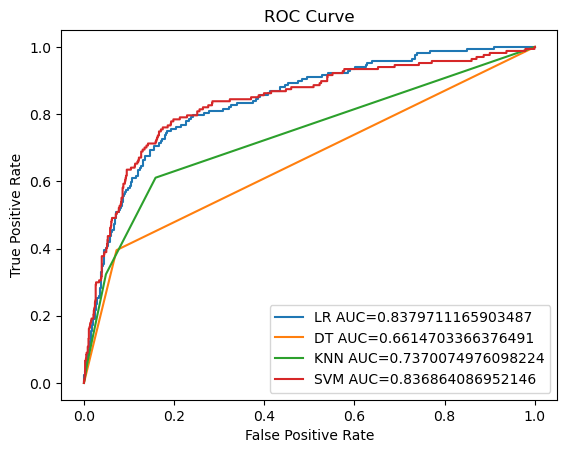

In [44]:
# Plotting ROC Curve data for all 4 models
y_pred_proba = log_pipe.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba, pos_label=1)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

y_pred_proba_dt = dt_pipe.predict_proba(X_test)[::,1]
fpr2, tpr2, _ = metrics.roc_curve(y_test, y_pred_proba_dt, pos_label=1)
auc2 = metrics.roc_auc_score(y_test, y_pred_proba_dt)

y_pred_proba_knn = knn_pipe.predict_proba(X_test)[::,1]
fpr3, tpr3, _ = metrics.roc_curve(y_test, y_pred_proba_knn, pos_label=1)
auc3 = metrics.roc_auc_score(y_test, y_pred_proba_knn)

y_pred_proba_svm = svm_pipe.predict_proba(X_test)[::,1]
fpr4, tpr4, _ = metrics.roc_curve(y_test, y_pred_proba_svm, pos_label=1)
auc4 = metrics.roc_auc_score(y_test, y_pred_proba_svm)

# Create ROC curve
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.plot(fpr,tpr,label="LR AUC="+str(auc))
plt.plot(fpr2,tpr2,label="DT AUC="+str(auc2))
plt.plot(fpr3,tpr3,label="KNN AUC="+str(auc3))
plt.plot(fpr4,tpr4,label="SVM AUC="+str(auc4))
plt.title('ROC Curve')
plt.legend(loc=4)
plt.show()

In [45]:
# Combine feature names and coefficients into a dataframe
df_coef = pd.DataFrame({'feature': log_pipe[:-1].get_feature_names_out(), 'coef': log_pipe.named_steps['logreg'].coef_[0]})
df_coef.sort_values(by='coef', ascending=False, inplace=True)

# calculate the absolute value of the coefficients and sort
df_coef['abs_coef'] = df_coef['coef'].abs()
df_coef.sort_values(by='abs_coef', ascending=False, inplace=True)
df_coef

,feature,coef,abs_coef
1,num__duration,0.984988,0.984988
11,cat__loan_yes,-0.497292,0.497292
10,cat__loan_no,0.497230,0.497230
9,cat__housing_yes,-0.488358,0.488358
8,cat__housing_no,0.488296,0.488296
3,num__campaign,-0.378008,0.378008
4,num__pdays,0.248415,0.248415
5,num__previous,0.154792,0.154792
12,cat__default_no,-0.083204,0.083204
13,cat__default_yes,0.083142,0.083142
